In [1]:

import numpy as np
import pandas as pd
import pydicom
from pydicom.pixel_data_handlers.util import apply_voi_lut
import sys 
import os
from matplotlib import image
import matplotlib.pyplot as plt
import torch 


In [2]:
basepath="/N/slate/leckhoff/aml/data/chestxray"
example_image="/test/002a34c58c5b758217ed1f584ccbcfe9.dicom"
train_image="/train/000434271f63a053c4128a0ba6352c7f.dicom"

In [3]:
dicom_example=pydicom.dcmread(basepath+example_image)
dicom_example

/geode2/home/u050/leckhoff/Carbonate/micromamba/envs/ml_base/lib/python3.11/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '002a34c58c5b758217ed1f584ccbcfe9'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 166
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Computed Radiography Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 002a34c58c5b758217ed1f584ccbcfe9
(0002, 0010) Transfer Syntax UID                 UI: JPEG 2000 Image Compression (Lossless Only)
(0002, 0012) Implementation Class UID            UI: 1.2.3.4
(0002, 0013) Implementation Version Name         SH: 'INF_3.9'
(0002, 0016) Source Application Entity Title     AE: 'Samsung'
-------------------------------------------------
(0010, 0040) Patient's Sex                       CS: 'M'
(0010, 1020) Patient's Size                      DS: '0.0'
(0010, 1030) Patient's Weight                    DS: '0.0'
(0028, 0002) Samples per Pixel                   US: 1
(0028, 0004) Photometric Interpretation          CS: 'MONOCHROME2'
(0028, 0010) Rows      

/geode2/home/u050/leckhoff/Carbonate/micromamba/envs/ml_base/lib/python3.11/site-packages/pydicom/pixel_data_handlers/pillow_handler.py:238: UserWarning: The (0028,0101) 'Bits Stored' value (14-bit) doesn't match the JPEG 2000 data (16-bit). It's recommended that you change the 'Bits Stored' value
  warnings.warn(


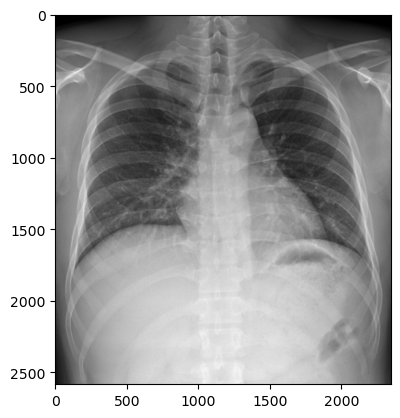

In [4]:
image_example=apply_voi_lut(dicom_example.pixel_array, dicom_example)

plt.imshow(image_example, cmap="grey")

In [5]:
dicom_example_train=pydicom.dcmread(basepath+train_image)
dicom_example_train

/geode2/home/u050/leckhoff/Carbonate/micromamba/envs/ml_base/lib/python3.11/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '000434271f63a053c4128a0ba6352c7f'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 156
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Digital X-Ray Image Storage - For Presentation
(0002, 0003) Media Storage SOP Instance UID      UI: 000434271f63a053c4128a0ba6352c7f
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.3.4
(0002, 0013) Implementation Version Name         SH: ''
(0002, 0016) Source Application Entity Title     AE: 'VITREA1'
-------------------------------------------------
(0010, 0040) Patient's Sex                       CS: 'O'
(0028, 0002) Samples per Pixel                   US: 1
(0028, 0004) Photometric Interpretation          CS: 'MONOCHROME1'
(0028, 0010) Rows                                US: 2836
(0028, 0011) Columns                             US: 2336
(0028, 0030) Pixel Spacing            

In [6]:
image_example_train=apply_voi_lut(dicom_example_train.pixel_array, dicom_example_train)
image_example_train= np.amax(image_example_train)-image_example_train

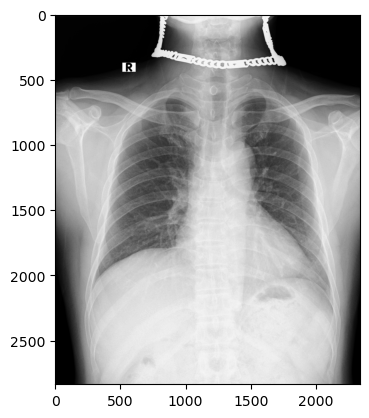

In [7]:
plt.imshow(image_example_train, cmap="grey")

In [8]:
dicom_example_train.PatientSex

'O'

We see, that our labels are only stored in the train.csv. Furthermore we will need to split this into a training and test set as the labels of the test set are not known to us. But first we create a dictionary containing the labels for fast-lookup 

In [9]:
metadata_kaggle=pd.read_csv("data/vinbigdata/train.csv")
metadata_kaggle

,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max
0,50a418190bc3fb1ef1633bf9678929b3,No finding,14,R11,NaN,NaN,NaN,NaN
1,21a10246a5ec7af151081d0cd6d65dc9,No finding,14,R7,NaN,NaN,NaN,NaN
2,9a5094b2563a1ef3ff50dc5c7ff71345,Cardiomegaly,3,R10,691.0,1375.0,1653.0,1831.0
3,051132a778e61a86eb147c7c6f564dfe,Aortic enlargement,0,R10,1264.0,743.0,1611.0,1019.0
4,063319de25ce7edb9b1c6b8881290140,No finding,14,R10,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
67909,936fd5cff1c058d39817a08f58b72cae,No finding,14,R1,NaN,NaN,NaN,NaN
67910,ca7e72954550eeb610fe22bf0244b7fa,No finding,14,R1,NaN,NaN,NaN,NaN
67911,aa17d5312a0fb4a2939436abca7f9579,No finding,14,R8,NaN,NaN,NaN,NaN
67912,4b56bc6d22b192f075f13231419dfcc8,Cardiomegaly,3,R8,771.0,979.0,1680.0,1311.0


In [10]:
lookup_dict=dict(zip(metadata_kaggle["image_id"], metadata_kaggle["class_id"]))

In [11]:
#import json 
##filename="label_dict.py"
#with open(filename, "x") as f:
#    f.write("label_dict=")
#    f.write(json.dumps(lookup_dict))

In preparation we already create a binary labels

In [12]:
metadata_kaggle["class_binary"]=metadata_kaggle["class_id"].apply(lambda x: int(x!=14))
label_dict_binary=dict(zip(metadata_kaggle["image_id"], metadata_kaggle["class_binary"]))

In [13]:
#import json 
#filename="label_dict_binary.py"
#with open(filename, "x") as f:
#    f.write("label_dict_binary=")
#    f.write(json.dumps(label_dict_binary))

As dicom is not covered by pytorch's default dataloaders, we have to implement a dataloader ourself; we thereby start to already think about the configuration of our models and decide to have a subconfig.


In [14]:
from sklearn.model_selection import train_test_split
#testing images for development
ids = metadata_kaggle.image_id.sample(n=3000, replace=False).to_list()
ids_train, next_split = train_test_split(ids, test_size=0.4)
ids_validate, ids_test = train_test_split(next_split, test_size=0.5)

In [15]:
%load_ext autoreload
%autoreload
from omegaconf import OmegaConf
from aml_dicom.dataclasses import DICOMDataset

conf_dict={"data":
                {"path": "/N/slate/leckhoff/aml/data/chestxray/train/", 
                "ids": {"train": ids_train, 
                        "validate": ids_validate,
                        "test": ids_validate
                        }, 
                "labels": "multiclass",
                "transforms":"imagenet", 
                "normalize":True,
                "covariates":None}, 
            "model": {
                "type": "ResNet50", 
                },
            "training":
                {
                "batch_size":32, 
                "max_epochs": 10},
            "run":{
                "base_dir": "/geode2/home/u050/leckhoff/Carbonate/classes/applied_ml/project_aml/run_dir",
                "checkpoint_by": "val_loss"
            }
            }

config=OmegaConf.create(conf_dict)



In [16]:
import yaml 
with open("ResNet50.yaml","w") as f:
    f.write(yaml.dump(OmegaConf.to_object(config)))

Next step we refine our workflow in a way, that we can control everything from the config

In [23]:
%autoreload
from aml_dicom.train import main
main("ResNet50.yaml")

Starting at 20231205-004808 from /geode2/home/u050/leckhoff/Carbonate/classes/applied_ml/project_aml


/geode2/home/u050/leckhoff/Carbonate/micromamba/envs/ml_base/lib/python3.11/site-packages/pytorch_lightning/loggers/wandb.py:398: UserWarning: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
  rank_zero_warn(
/geode2/home/u050/leckhoff/Carbonate/micromamba/envs/ml_base/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/geode2/home/u050/leckhoff/Carbonate/micromamba/envs/ml_base/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_W

NotImplementedError: Support for `validation_epoch_end` has been removed in v2.0.0. `XRayResNet50` implements this method. You can use the `on_validation_epoch_end` hook instead. To access outputs, save them in-memory as instance attributes. You can find migration examples in https://github.com/Lightning-AI/lightning/pull/16520.

In [21]:
config_copy=config.copy()


In [22]:
del config_copy.data.ids